## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader']


## Read PredictIt Data Instead

In [2]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    df.columns = [symbol + ":" + name.lower() for name in df.columns]

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
11/13/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/14/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/15/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/16/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/17/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0


## Plot the closing prices for all the markets

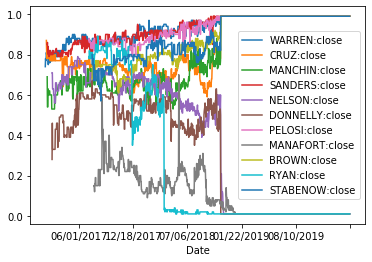

In [4]:
%matplotlib inline
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot()

## Slice just a specific time period from the dataframe

In [5]:
all_data.index = pd.to_datetime(all_data.index)

In [6]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '09-04-2019')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,0.77,0.77,0.78,0.78,...,0.82,0.82,0,0.0000,0.72,0.69,0.72,0.70,16,0.6981
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.70,0.70,45,0.7000
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.72,0.72,1,0.7200
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,0.78,0.78,0.78,0.78,...,0.82,0.81,120,0.8100,0.72,0.72,0.72,0.72,0,0.0000
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.78,0.78,0.78,0.78,...,0.87,0.81,52,0.8619,0.72,0.72,0.72,0.72,9,0.7200


## Define Exchanges

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [7]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

### Doing it without adding other features. Just use price 

In [8]:
#You still have to add "Streams" for all the standard columns open, high, low, close, volume in this case
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(subset_data[name])) for name in subset_data.columns]
    

In [9]:
#Then create the Feed from it
feed = DataFeed([predictit_ns])
feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [10]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## Environment

In [11]:
from tensortrade.environments import TradingEnvironment

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [12]:
env.feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

#### ^An environment doesn't just show the OHLCV for each instrument. It also shows free, locked, total, as well as "USD_BTC"

## Using 123's Ray example

In [13]:
import os
parent_dir = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader"
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [14]:
!PYTHONWARNINGS=ignore::yaml.YAMLLoadWarning

In [15]:
#Import tensortrade
import tensortrade

# Define Exchanges
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream


# Define External Data Feed (features)
import ta
from sklearn import preprocessing
from tensortrade.data import DataFeed, Module

# Portfolio
from tensortrade.instruments import USD, BTC
from tensortrade.wallets import Wallet, Portfolio
from tensortrade.actions import ManagedRiskOrders
from gym.spaces import Discrete

# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="simple",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


ray.init(ignore_reinit_error=True)
config = dqn.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
#config["num_workers"] = 4

#config["num_envs_per_worker"] = 8
# config["eager"] = False

# config["timesteps_per_iteration"] = 100
# config["train_batch_size"] = 20

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-05 22:30:39,190	INFO resource_spec.py:212 -- Starting Ray with 5.71 GiB memory available for workers and up to 2.86 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-05 22:30:39,555	INFO services.py:1078 -- View the Ray dashboard at localhost:8265
2020-03-05 22:30:39,868	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-05 22:30:39,952	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. P

{'num_workers': 0,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

## Train using the old fashioned RLLib way

In [18]:

for i in range(10):
    # Perform one iteration of training the policy with PPO
    print("Training iteration {}...".format(i))
    result = trainer.train()
    print("result: {}".format(result))
    
    if i % 100 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)

Training iteration 0...


/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



result: {'episode_reward_max': -0.07917777901814049, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': -0.07917777901814049, 'episode_len_mean': 231.0, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [-0.07917777901814049], 'episode_lengths': [231]}, 'sampler_perf': {'mean_env_wait_ms': 30.23118369664128, 'mean_processing_ms': 0.24301072825556216, 'mean_inference_ms': 1.3211781799557651}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 1.0, 1.0, 1.0, 1.0], 'num_target_updates': 1, 'num_steps_trained': 0, 'num_steps_sampled': 1008, 'sample_time_ms': 528.891, 'replay_time_ms': nan, 'grad_time_ms': nan, 'update_time_ms': 19.556, 'opt_peak_throughput': 0.0, 'opt_samples': nan, 'learner': {}}, 'timesteps_this_iter': 1008, 'done': False, 'timesteps_total': 1008, 'episodes_total': 1, 'training_iteration': 1, 'experiment_id': 'b003e5f53353495ebd520fe8ea71

result: {'episode_reward_max': 45.61448333452774, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 19.33637334561403, 'episode_len_mean': 456.6666666666667, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [12.473814481332498, -0.07917777901814049, 45.61448333452774], 'episode_lengths': [681, 231, 458]}, 'sampler_perf': {'mean_env_wait_ms': 31.350341314536976, 'mean_processing_ms': 0.23026087481920313, 'mean_inference_ms': 1.2758857940972443}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.901216, 0.901216, 0.901216, 0.901216], 'num_target_updates': 5, 'num_steps_trained': 4032, 'num_steps_sampled': 3024, 'sample_time_ms': 478.158, 'replay_time_ms': 3.194, 'grad_time_ms': 9.196, 'update_time_ms': 18.762, 'opt_peak_throughput': 3479.622, 'opt_samples': 32.0, 'learner': {'default_policy': {'cur_lr': 0.0005000000237487257, 'mean_q': 3.4352071, 'mi

result: {'episode_reward_max': 45.61448333452774, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 22.60597178773067, 'episode_len_mean': 546.4, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [23.729383185514305, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945], 'episode_lengths': [681, 231, 458, 681, 681]}, 'sampler_perf': {'mean_env_wait_ms': 31.33125047261321, 'mean_processing_ms': 0.2254412926131832, 'mean_inference_ms': 1.244663116644731}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.703648, 0.703648, 0.703648, 0.703648], 'num_target_updates': 9, 'num_steps_trained': 8064, 'num_steps_sampled': 5040, 'sample_time_ms': 438.652, 'replay_time_ms': 3.052, 'grad_time_ms': 8.891, 'update_time_ms': 18.735, 'opt_peak_throughput': 3599.112, 'opt_samples': 32.0, 'learner': {'default_policy': {'cur_lr': 0.0005000000

result: {'episode_reward_max': 76.54231491769683, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 35.56894147016873, 'episode_len_mean': 714.5714285714286, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [59.410416434830964, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945, 23.729383185514305, 76.54231491769683], 'episode_lengths': [1589, 231, 458, 681, 681, 681, 681]}, 'sampler_perf': {'mean_env_wait_ms': 30.959213321614467, 'mean_processing_ms': 0.21723636440480062, 'mean_inference_ms': 1.2279858777055712}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.50608, 0.50608, 0.50608, 0.50608], 'num_target_updates': 13, 'num_steps_trained': 12096, 'num_steps_sampled': 7056, 'sample_time_ms': 437.471, 'replay_time_ms': 3.038, 'grad_time_ms': 8.933, 'update_time_ms': 18.421, 'opt_peak_throughput': 3582.11, 'opt_samples

result: {'episode_reward_max': 76.54231491769683, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 35.41097296292293, 'episode_len_mean': 707.1111111111111, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [45.0912726410283, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945, 23.729383185514305, 76.54231491769683, 59.410416434830964, 24.62489373409698], 'episode_lengths': [681, 231, 458, 681, 681, 681, 681, 1589, 681]}, 'sampler_perf': {'mean_env_wait_ms': 30.81546680034927, 'mean_processing_ms': 0.21395863850195826, 'mean_inference_ms': 1.213424563871234}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.308512, 0.308512, 0.308512, 0.308512], 'num_target_updates': 17, 'num_steps_trained': 16128, 'num_steps_sampled': 9072, 'sample_time_ms': 431.928, 'replay_time_ms': 2.988, 'grad_time_ms': 9.175, 'update_time_ms': 18.

In [21]:
result['hist_stats']['episode_reward']

[76.87280873211759,
 14.216861343844199,
 -0.07917777901814049,
 45.61448333452774,
 12.473814481332498,
 31.291355716296945,
 23.729383185514305,
 76.54231491769683,
 59.410416434830964,
 24.62489373409698,
 45.0912726410283]

## OR train using the tune way (better so far)

In [16]:
analysis = tune.run(
        "DQN",
        name = "DQN10-paralellism",
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 4000,
        },
        config={
            "env": "ray_trading_env",
            "lr": grid_search([1e-4]),  # try different lrs
            "num_workers": 2,  # parallelism,

        },
    )

Trial name,status,loc,lr
DQN_ray_trading_env_f0f9ef3e,RUNNING,,


(pid=38463) 2020-03-05 22:31:21,364	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=38463) 2020-03-05 22:31:22,724	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=38463) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:
(pid=38463) 
(pid=38463) WARN: Box bound precision lowered by casting to float32
(pid=38463) 
(pid=38463) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=38463) 
(pid=38463) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=38463) 
(pid=38463) 2020-03-05 22:31:24,224	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=38465) /Users/jasonfiacco/Documents/Ya

Result for DQN_ray_trading_env_f0f9ef3e:
  custom_metrics: {}
  date: 2020-03-05_22-31-55
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 47ffcdd402894da38e69850e74976c11
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1000
    num_steps_trained: 0
    num_target_updates: 1
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 195.384
    update_time_ms: 10.962
  iterations_since_restore: 1
  node_ip: 192.168.0.179
  num_healthy_workers: 2
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 30.642222222222223
    ram_util_percent: 67.71333333333334
  pid: 38463
  policy_reward_max: {}
  policy_reward_mean: {}
  policy_reward_min: {}
  sampler_perf: {}
  time_since_restore

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_f0f9ef3e,RUNNING,192.168.0.179:38463,0.0001,nan,31.0197,1000,1


(pid=38463) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:
(pid=38463) 
(pid=38463) Mean of empty slice.
(pid=38463) 
(pid=38463) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=38463) 
(pid=38463) invalid value encountered in double_scalars
(pid=38463) 
Result for DQN_ray_trading_env_f0f9ef3e:
  custom_metrics: {}
  date: 2020-03-05_22-32-22
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 0.6250912731909636
  episode_reward_mean: 0.5163233195834127
  episode_reward_min: 0.4075553659758617
  episodes_this_iter: 2
  episodes_total: 2
  experiment_id: 47ffcdd402894da38e69850e74976c11
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 11.316
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        ma

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_f0f9ef3e,RUNNING,192.168.0.179:38463,0.0001,0.516323,58.6231,2000,2


Result for DQN_ray_trading_env_f0f9ef3e:
  custom_metrics: {}
  date: 2020-03-05_22-32-56
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 0.6250912731909636
  episode_reward_mean: 0.055084029436991894
  episode_reward_min: -0.4197199391459785
  episodes_this_iter: 2
  episodes_total: 4
  experiment_id: 47ffcdd402894da38e69850e74976c11
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.9020000100135803
    - 0.9020000100135803
    grad_time_ms: 9.948
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 4.499229907989502
        mean_q: 2.695563793182373
        mean_td_error: -0.13790759444236755
        min_q: -0.37679219245910645
        model: {}
    num_steps_sampled: 3000
    num_steps_trained: 8000
    num_target_updates: 5
    opt_peak_throughput: 3216.645
    opt_samples: 32.0
    replay_time_ms: 3.192
    sample_time_ms: 149.953
    update_time_ms: 176.148
  iterations

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_f0f9ef3e,RUNNING,192.168.0.179:38463,0.0001,0.055084,91.7126,3000,3


Result for DQN_ray_trading_env_f0f9ef3e:
  custom_metrics: {}
  date: 2020-03-05_22-33-45
  done: true
  episode_len_mean: 733.0
  episode_reward_max: 0.6250912731909636
  episode_reward_mean: 0.05508402943699192
  episode_reward_min: -0.4197199391459785
  episodes_this_iter: 0
  episodes_total: 4
  experiment_id: 47ffcdd402894da38e69850e74976c11
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.8040000200271606
    - 0.8040000200271606
    grad_time_ms: 10.238
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 4.468306541442871
        mean_q: 3.5185770988464355
        mean_td_error: -0.12534084916114807
        min_q: 1.928918480873108
        model: {}
    num_steps_sampled: 4000
    num_steps_trained: 12000
    num_target_updates: 7
    opt_peak_throughput: 3125.573
    opt_samples: 32.0
    replay_time_ms: 3.622
    sample_time_ms: 181.717
    update_time_ms: 172.411
  iterations_s

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_f0f9ef3e,RUNNING,192.168.0.179:38463,0.0001,0.055084,141.287,4000,4


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_f0f9ef3e,TERMINATED,,0.0001,0.055084,141.287,4000,4


2020-03-05 22:33:45,728	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.
2020-03-05 22:33:46,065	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff4d81fd5d0100.
2020-03-05 22:33:46,077	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff2512146c0100.
2020-03-05 22:33:50,758	ERROR worker.py:998 -- Possible unhandled error from worker: ray::DQN.stop() (pid=38463, ip=192.168.0.179)
  File "python/ray/_raylet.pyx", line 452, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 430, in ray._raylet.execute_task.function_executor
  File "/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/tune/trainable.py", line 500, in stop
    self._stop()
  File "/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/a

In [ ]:
#Use the below command to see results
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

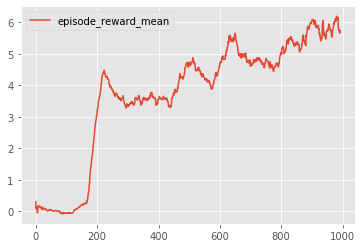

In [24]:
#Now you can plot the reward results of your tuner.
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [25]:
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_993/checkpoint-993"))

2020-03-04 21:52:15,295	WARNING trainable.py:210 -- Getting current IP.
2020-03-04 21:52:15,299	INFO trainable.py:416 -- Restored on 172.27.234.225 from checkpoint: /Users/jasonfiacco/ray_results/DQN9-big/DQN_ray_trading_env_7a427ba4_0_lr=0.0001_2020-03-04_00-32-02kz2wv4_s/checkpoint_993/checkpoint-993
2020-03-04 21:52:15,301	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 993, '_timesteps_total': 1000944, '_time_total': 75190.61388278008, '_episodes_total': 1717}


In [16]:
trainer.restore("/Users/jasonfiacco/ray_results/DQN4/DQN_ray_trading_env_fedb24f0_0_lr=1e-06_2020-03-03_15-46-02kzbdv53d/checkpoint_5/checkpoint-5")

ValueError: Cannot feed value of shape (990, 256) for Tensor 'default_policy/Placeholder_default_policy/fc_1/kernel:0', which has shape '(1875, 256)'

## Testing

In [31]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [32]:
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state)

    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

[2020-03-04 9:54:39 PM] Step: 1
[2020-03-04 9:54:41 PM] Step: 101
[2020-03-04 9:54:44 PM] Step: 201
[2020-03-04 9:54:47 PM] Step: 301
[2020-03-04 9:54:50 PM] Step: 401
[2020-03-04 9:54:52 PM] Step: 501
[2020-03-04 9:54:55 PM] Step: 601
[2020-03-04 9:54:58 PM] Step: 701
Cumulative reward:  4.969025307093819


## Plot

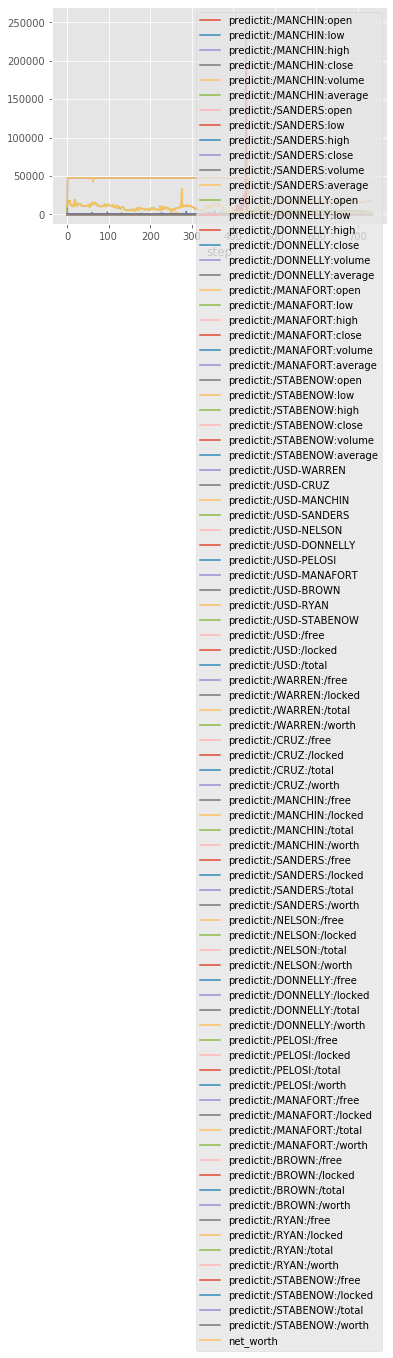

In [33]:
%matplotlib inline

portfolio.performance.plot()

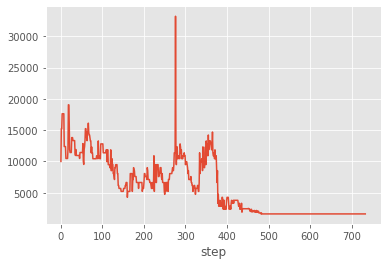

In [34]:
portfolio.performance.net_worth.plot()

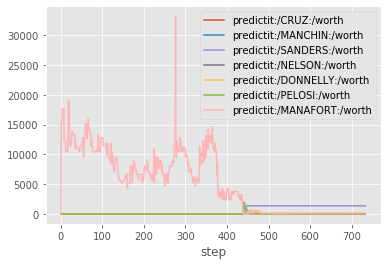

In [47]:
#Plot the total balance in each type of item
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]
weights.iloc[:, 1:8].plot()


## Try Plotly Render too

In [ ]:
from tensortrade.environments.render import PlotlyTradingChart
from tensortrade.environments.render import FileLogger

chart_renderer = PlotlyTradingChart(
    height = 800
)

file_logger = FileLogger(
    filename='example.log',  # omit or None for automatic file name
    path='training_logs'  # create a new directory if doesn't exist, None for no directory
)

In [ ]:
price_history.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

In [ ]:
env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='managed-risk',
    reward_scheme='risk-adjusted',
    window_size=20,
    price_history=price_history,
    renderers = [chart_renderer, file_logger]
)

In [ ]:
from tensortrade.agents import DQNAgent

agent = DQNAgent(env)
agent.train(n_episodes=1, n_steps=1000, render_interval=1)

## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)